In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
cols = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]


In [12]:
data=pd.read_csv('pima-indians-diabetes.data.csv', header=None, names=cols)

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
x=data.drop("Outcome", axis=1)
y=data["Outcome"]

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
print("accuracy", accuracy_score(y_test,y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision score", precision_score(y_test,y_pred))
print("recall score", recall_score(y_test, y_pred))

accuracy 0.7662337662337663
f1 score 0.6842105263157895
precision score 0.6610169491525424
recall score 0.7090909090909091


In [17]:
mnb=MultinomialNB()
mnb.fit(x_train, y_train)
y_pred=mnb.predict(x_test)
print("accuracy", accuracy_score(y_test,y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision score", precision_score(y_test,y_pred))
print("recall score", recall_score(y_test, y_pred))

accuracy 0.6623376623376623
f1 score 0.5185185185185185
precision score 0.5283018867924528
recall score 0.509090909090909


In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)
print("accuracy", accuracy_score(y_test,y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision score", precision_score(y_test,y_pred))
print("recall score", recall_score(y_test, y_pred))

accuracy 0.7467532467532467
f1 score 0.6722689075630253
precision score 0.625
recall score 0.7272727272727273


In [21]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print("accuracy", accuracy_score(y_test,y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision score", precision_score(y_test,y_pred))
print("recall score", recall_score(y_test, y_pred))

accuracy 0.6623376623376623
f1 score 0.5517241379310345
precision score 0.5245901639344263
recall score 0.5818181818181818


In [44]:
model = SVC(probability=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1-Score",  f1_score(y_test, y_pred))

Accuracy 0.7662337662337663
Precision 0.7209302325581395
Recall 0.5636363636363636
F1-Score 0.6326530612244898


In [45]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

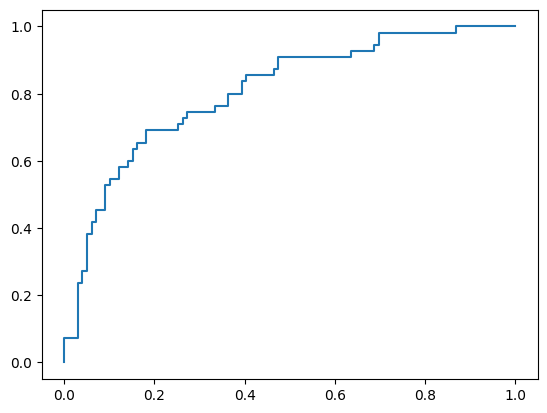

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

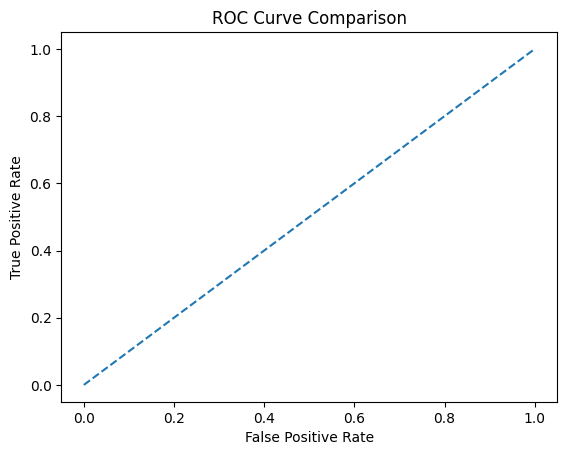

In [47]:
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.show()

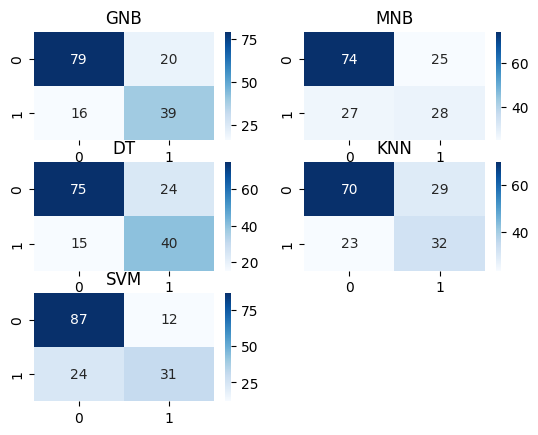

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

cms = {
    "GNB": confusion_matrix(y_test, gnb.predict(x_test)),
    "MNB": confusion_matrix(y_test, mnb.predict(x_test)),
    "DT":  confusion_matrix(y_test, dtc.predict(x_test)),
    "KNN": confusion_matrix(y_test, knn.predict(x_test)),
    "SVM": confusion_matrix(y_test, model.predict(x_test))
}
i = 1
for name, cm in cms.items():
    plt.subplot(3,2,i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    i += 1
plt.show()
